# Restaurant Review Sentiment Analysis and Feedback
This project focuses on building a machine learning model to analyze and classify customer reviews of restaurants as either positive or negative. The goal is to understand customer sentiments and provide actionable insights based on the textual feedback.

## Project Overview
Restaurants receive numerous reviews daily, and manually analyzing these reviews to gauge customer satisfaction can be time-consuming and inefficient. By leveraging Natural Language Processing (NLP) techniques and machine learning algorithms, this project automates the sentiment analysis process, enabling quick and accurate identification of customer opinions.

## 1. Importing Libraries
Description: Importing necessary libraries for data processing, machine learning, and sentiment analysis.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Downloading NLTK data
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91757\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91757\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 2. Loading and Preprocessing Data
Loading the dataset and displaying the first few rows to understand the structure.

In [2]:
# Loading the dataset
# Use raw string literal to avoid issues with file path
data = pd.read_csv('Restaurant_Reviews.tsv', sep='\t', quoting=3)

# Display the first few rows of the dataset
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


## 3. Text Cleaning Function
Defining a function to clean and preprocess the text data, including removing HTML tags, non-letter characters, and stopwords, as well as applying stemming.

In [3]:
# Function to clean text data
def clean_text(review):
    # Remove HTML tags
    review = re.sub('<.*?>', ' ', review)  
    # Keep only letters
    review = re.sub('[^a-zA-Z]', ' ', review)  
    # Convert to lowercase
    review = review.lower()  
    # Split into words
    review = review.split()  
    # Initialize PorterStemmer for stemming
    ps = PorterStemmer()  
    # Remove stopwords and apply stemming
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]  
    # Join words back into a single string
    review = ' '.join(review)  
    return review

# Cleaning all reviews in the dataset
corpus = [clean_text(review) for review in data['Review']]

## 4. TF-IDF Vectorization
Converting the cleaned text into numerical features using TF-IDF Vectorization.

In [4]:
# Vectorizing the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=1500)
x = tfidf.fit_transform(corpus).toarray()

# Defining the dependent variable
y = data.iloc[:, 1].values

## 5. Splitting the Dataset
Splitting the dataset into training and testing sets with an 80-20 split.

In [5]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## 6. Model Building and Hyperparameter Tuning
Building the RandomForestClassifier model and using GridSearchCV to tune hyperparameters.



In [6]:
# Initializing the RandomForestClassifier
classifier = RandomForestClassifier()

# Defining the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 50, 100, None],
    'criterion': ['gini', 'entropy']
}

# Using GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
best_classifier = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\91757\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
59 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91757\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91757\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\91757\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\91757\anaconda3\Lib\site-package

## 7. Model Evaluation
Evaluating the model's performance using the confusion matrix, classification report, and accuracy score.



In [7]:
# Predicting the test set results
y_pred = best_classifier.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
[[87 10]
 [41 62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.90      0.77        97
           1       0.86      0.60      0.71       103

    accuracy                           0.74       200
   macro avg       0.77      0.75      0.74       200
weighted avg       0.77      0.74      0.74       200

Accuracy: 74.50%


## 8. Sentiment Prediction Function
Creating a function to predict whether a review is positive or negative based on the trained model.

In [8]:
# Function to predict the sentiment of a review
def predict_review(review):
    # Clean the review text
    cleaned_review = clean_text(review)
    # Transform the review text into TF-IDF vector
    review_vector = tfidf.transform([cleaned_review]).toarray()
    # Predict sentiment using the best classifier
    prediction = best_classifier.predict(review_vector)
    return "Positive" if prediction == 1 else "Negative"

# Example predictions
print(predict_review("The food was awesome"))
print(predict_review("The food was horrible and the service was terrible."))

Positive
Negative


## 9. Suggesting Areas of Improvement
Defining a function to suggest improvements based on specific aspects like food, service, ambiance, and price.

In [9]:
# Function to suggest areas of improvement based on the review
def suggest_improvements(review):
    sia = SentimentIntensityAnalyzer()
    aspects = {
        'food': ['food', 'meal', 'dish', 'taste'],
        'service': ['service', 'staff', 'waiter', 'waitress'],
        'ambiance': ['ambiance', 'atmosphere', 'environment'],
        'price': ['price', 'cost', 'value']
    }
    suggestions = []
    cleaned_review = clean_text(review)
    for aspect, keywords in aspects.items():
        if any(word in cleaned_review for word in keywords):
            sentiment_score = sia.polarity_scores(review)
            if sentiment_score['neg'] > sentiment_score['pos']:
                suggestions.append(f"Improve {aspect}")
    return suggestions if suggestions else ["No specific improvements needed"]

# Example suggestion
print(suggest_improvements("The food was horrible "))

['Improve food']


## 10. Full Review Analysis
Combining sentiment prediction and improvement suggestions into a full analysis function for restaurant reviews.



In [36]:
# Function to perform full review analysis: sentiment prediction and improvement suggestions
def full_review_analysis(review):
    sentiment = predict_review(review)
    suggestions = suggest_improvements(review) if sentiment == "Negative" else ["No improvements needed"]
    return sentiment, suggestions


## Example 1

In [37]:
# Example full analysis
review1 = "The food was horrible and the service was terrible."
sentiment, suggestions = full_review_analysis(review1)
print("Review 1: ", review1)
print(f"Review Sentiment: {sentiment}")
print("Suggestions for Improvement:")
for suggestion in suggestions:
    print(suggestion)

Review 1:  The food was horrible and the service was terrible.
Review Sentiment: Negative
Suggestions for Improvement:
Improve food


## 2

In [38]:
review2 = "The food was good and the service was nice."
print("Review 2: ", review2)
sentiment, suggestions = full_review_analysis(review2)
print(f"Review Sentiment: {sentiment}")
print("Suggestions for Improvement:")
for suggestion in suggestions:
    print(suggestion)

Review 2:  The food was good and the service was nice.
Review Sentiment: Positive
Suggestions for Improvement:
No improvements needed


Naive Bayes Performance:
--------------------------------------------------
Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        97
           1       0.77      0.80      0.78       103

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



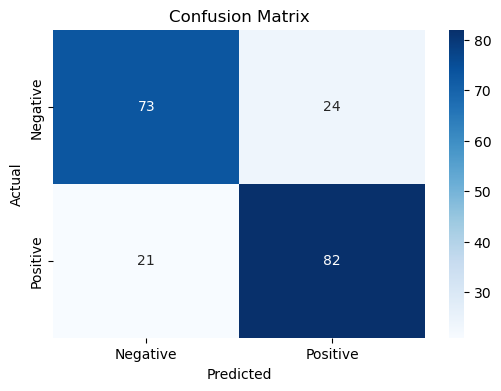

In [15]:
# Import Naive Bayes (MultinomialNB is best for TF-IDF)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Initialize and train Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

# Predictions
y_pred = nb_classifier.predict(x_test)

# Performance Evaluation
print("Naive Bayes Performance:\n" + "-"*50)

# 1. Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# 2. Classification Report (Precision, Recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

[0]	validation_0-logloss:0.66325
[1]	validation_0-logloss:0.64535
[2]	validation_0-logloss:0.63163
[3]	validation_0-logloss:0.62139
[4]	validation_0-logloss:0.61265
[5]	validation_0-logloss:0.60800
[6]	validation_0-logloss:0.60415
[7]	validation_0-logloss:0.59545
[8]	validation_0-logloss:0.59040
[9]	validation_0-logloss:0.58295
[10]	validation_0-logloss:0.57830
[11]	validation_0-logloss:0.57338
[12]	validation_0-logloss:0.57126
[13]	validation_0-logloss:0.56753
[14]	validation_0-logloss:0.56718
[15]	validation_0-logloss:0.55938
[16]	validation_0-logloss:0.55639
[17]	validation_0-logloss:0.55557
[18]	validation_0-logloss:0.55381
[19]	validation_0-logloss:0.55136
[20]	validation_0-logloss:0.55100
[21]	validation_0-logloss:0.55141
[22]	validation_0-logloss:0.55130
[23]	validation_0-logloss:0.55336
[24]	validation_0-logloss:0.55079
[25]	validation_0-logloss:0.54843
[26]	validation_0-logloss:0.54788
[27]	validation_0-logloss:0.54644
[28]	validation_0-logloss:0.54643
[29]	validation_0-loglos

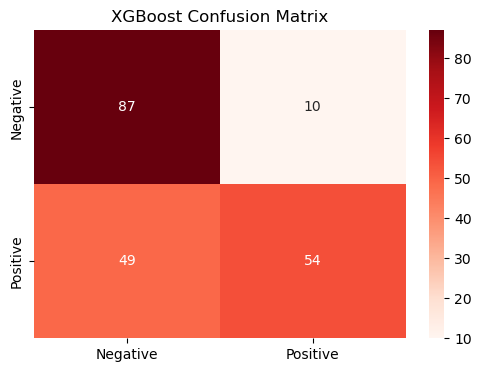

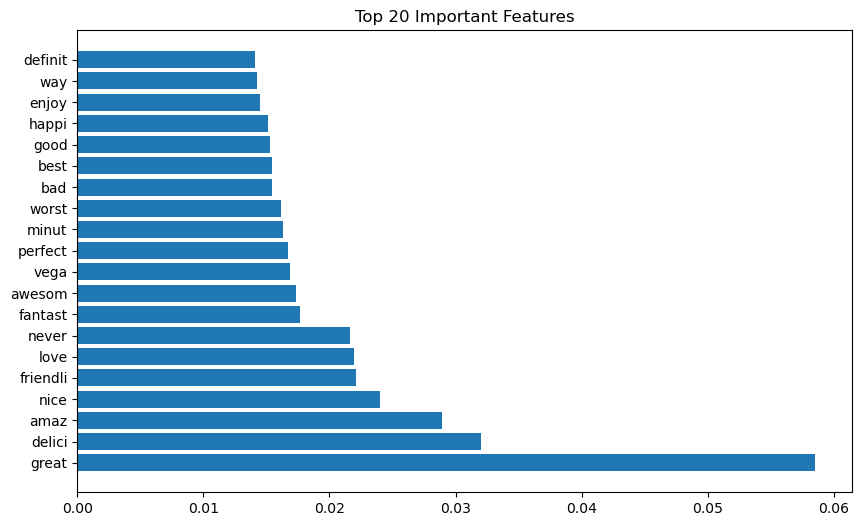

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize XGBoost with basic parameters
xgb = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    eval_metric='logloss',
    early_stopping_rounds=10,
    n_estimators=100
)

# Train with validation set for early stopping
xgb.fit(x_train, y_train,
        eval_set=[(x_test, y_test)],
        verbose=True)

# Predictions
y_pred = xgb.predict(x_test)

# Performance Evaluation
print("XGBoost Performance:\n" + "-"*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Reds',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('XGBoost Confusion Matrix')
plt.show()

# Feature Importance (Top 20)
plt.figure(figsize=(10,6))
sorted_idx = xgb.feature_importances_.argsort()[::-1][:20]
plt.barh([tfidf.get_feature_names_out()[i] for i in sorted_idx],
         xgb.feature_importances_[sorted_idx])
plt.title("Top 20 Important Features")
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42),
                         param_grid,
                         cv=3,
                         scoring='f1',
                         n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_

C:\Users\91757\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 243.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91757\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91757\anaconda3\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\91757\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1663, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                         

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'subsample': 0.8}
